<a href="https://colab.research.google.com/github/vstadnytskyi/colab/blob/main/investment_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is investment notebook. 

This notebook is divided into cell. A cell can be or text such as this one or a Python code like one below.

In [ ]:
#this is first cell with Python code, where we usually install and import needed package and libraries

#install yfinance and numeric python
!pip install yfinance
import yfinance as yf

#import 'maplotlib' subplibrary called 'pyplot' as plt
from matplotlib import pyplot as plt
#importing 'numpy' and call it 'np' as short form
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 618 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Next, let us create few functions that we can reuse and simplify our life.

In [ ]:
def get_data_from_ticket(tickerSymbol, period = '1d', start = '2000-1-1', end = '2020-06-10'):
  """
  this function returns data for given time step 'period' starting at a date 'start' and ending on date 'end'.

  
  """

  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  db = tickerData.history(period=period, start=start, end=end)

  #see your data
  return db

One of the first tickers we will look at is Schwab® S&P 500 Index Fund (SWPPX). We request data with '1d' time step between January 1st 2000 and August 21st 2022.

In [ ]:
SWPPX = get_data_from_ticket('SWPPX','1d',start = '2000-01-01', end = '2022-08-21')

The variable 'SWPPX' is a pandas dataframe, a structure developed for Pytho and designed to work with large datasets.

Inside of this object we have 7 columns: 
- Open
- High
- Low
- Close
- Dividends
- Stock Splits

In [ ]:
# this is how we can see what columns are available 
SWPPX.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

We can also extra data as x,y pairs

In [ ]:
x = SWPPX['Close'].index
y = SWPPX['Close'].values

And plot it as x,y plot

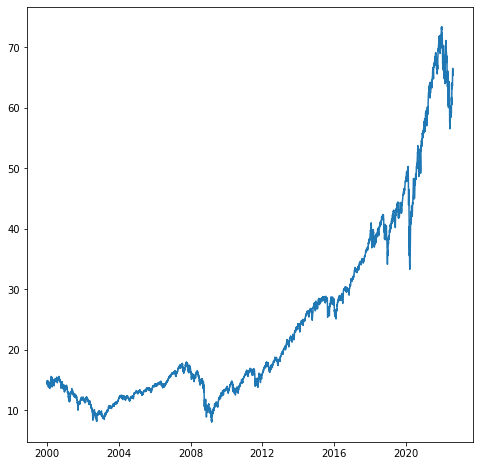

In [ ]:
plt.figure(figsize = (8,8)) # where figsize is the size of the figure in inches (not really directly obvious on a screen)
plt.plot(x,y)

We can make a dictionary with five ETFs from 
- VTI Vanguard Total Stock Market ETF	
- DBC Invesco DB Commodity Index Tracking Fund
- GLD SPDR Gold Trust
- IEF iShares 7-10 Year Treasury Bond ETF
- TLT iShares 20+ Year Treasury Bond ETF

In [ ]:
tickers = ['VTI', 'DBC', 'GLD', 'IEF', 'TLT']
AWP = {} # create dictionary named AWP from All Weather Portfolio

In [ ]:
for ticker in tickers:
  AWP[ticker] = get_data_from_ticket(ticker, period = '1d', start = '2000-1-1', end = '2022-08-21')

Text(0.5, 0, 'time in years')

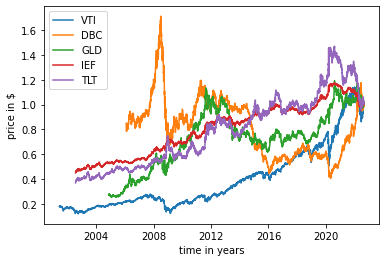

In [ ]:
plt.figure()
for ticker in tickers:
  x = AWP[ticker]['Close'].index
  y = AWP[ticker]['Close'].values
  plt.plot(x,y,label = ticker)
plt.legend()
plt.ylabel('price in $')
plt.xlabel('time in years')

One of the issues in the graph above is that the data does not start from the same date. It is because, for example, DBC has date of inception as 2006-02-03

Text(0.5, 1.0, '')

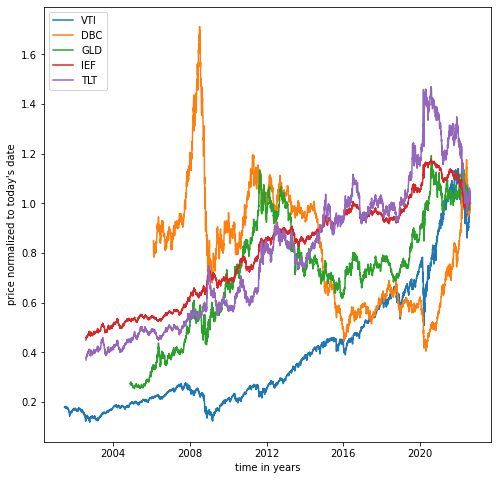

In [ ]:
plt.figure(figsize = (8,8))
for ticker in tickers:
  x = AWP[ticker]['Close'].index
  y = AWP[ticker]['Close'].values/AWP[ticker]['Close'].values[-1] # normalize to last value in the time series
  plt.plot(x,y,label = ticker)
plt.legend()
plt.ylabel("price normalized to today's date")
plt.xlabel('time in years')
plt.title('')